In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#TODO: Find a better way to parse csv files with pandas
list_of_animals = []

observations_df = pd.read_csv('observations.csv', keep_default_na=False, na_values=[""])
info_df = pd.read_csv('species_info.csv', keep_default_na=False, na_values=[""])

for col in info_df:
    print(info_df[col].unique())

inner_merge_df = pd.merge(left=observations_df, right=info_df, left_on='scientific_name', right_on='scientific_name')
inner_merge_df['conservation_status'] = inner_merge_df['conservation_status'].fillna('NaN')
inner_merge_df

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vas. Plant' 'NonVas. Plant']
['Clethrionomys gapperi gapperi' 'Bos bison' 'Bos taurus' ...
 'Parthenocissus vitacea' 'Vitis californica' 'Tribulus terrestris']
["Gapper's Red-Backed Vole" 'American Bison, Bison'
 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle' ...
 'Thicket Creeper, Virginia Creeper, Woodbine'
 'California Grape, California Wild Grape'
 'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vas. Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vas. Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vas. Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vas. Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
...,...,...,...,...,...,...
25627,Gulo gulo,Yosemite National Park,157,Mammal,Wolverine,NaN
25628,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vas. Plant,"Green Panic-Grass, Panic Grass",NaN
25629,Dichanthelium depauperatum,Bryce National Park,80,Vas. Plant,"Green Panic-Grass, Panic Grass",NaN
25630,Dichanthelium depauperatum,Yellowstone National Park,255,Vas. Plant,"Green Panic-Grass, Panic Grass",NaN


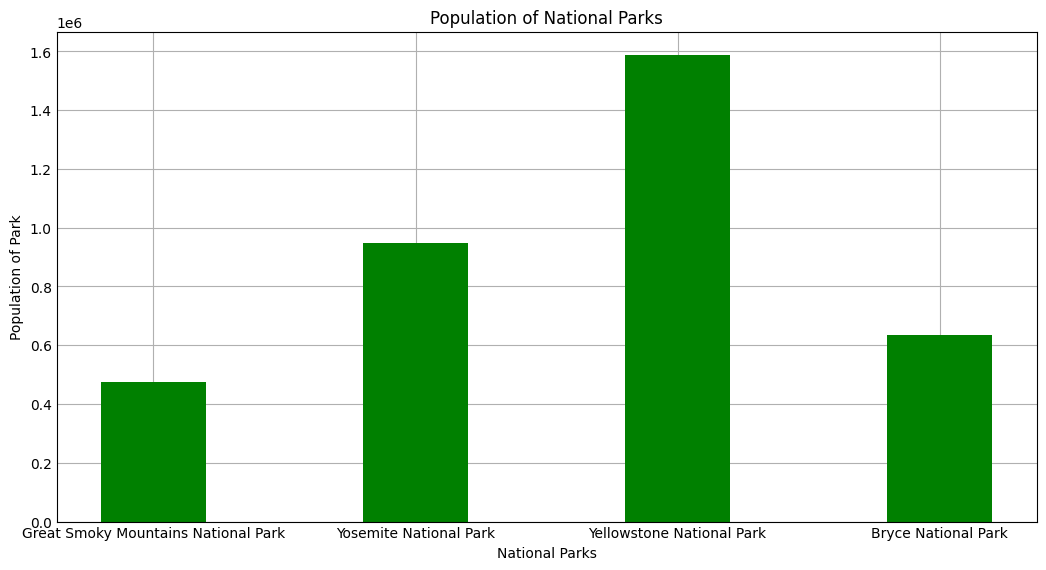

,Great Smoky Mountains National Park,Yosemite National Park,Yellowstone National Park,Bryce National Park
0,474863,949452,1587641,633291


In [16]:
# Populations of parks
park_pops = {'Great Smoky Mountains National Park':0, 'Yosemite National Park':0, 'Yellowstone National Park':0, 'Bryce National Park':0}

for index, row in inner_merge_df.iterrows():
    park_pops[row[1]] += row[2]

#for creating bar graph
plt.style.use('_mpl-gallery')
x = park_pops.keys()
y = park_pops.values()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(x, y, color ='green',width = 0.4)

plt.xlabel("National Parks")
plt.ylabel("Population of Park")
plt.title("Population of National Parks")
plt.show()

park_pops_df = pd.DataFrame(park_pops, index=[0])
park_pops_df

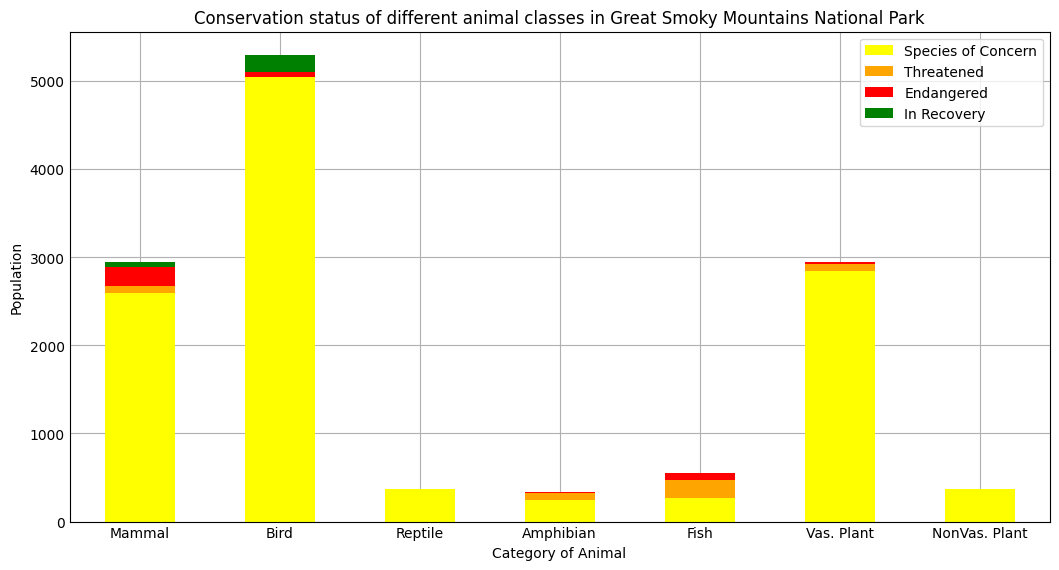

,Mammal,Bird,Reptile,Amphibian,Fish,Vas. Plant,NonVas. Plant
Species of Concern,2591,5047,365,249,268,2842,373
Threatened,84,0,0,73,202,81,0
Endangered,217,61,0,11,77,27,0
In Recovery,59,189,0,0,0,0,0


In [44]:
#Graph of conservation status across categories of Great Smoky National Park
Smoky={'Mammal':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
       'Bird':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Reptile':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Amphibian':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Fish':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Vas. Plant':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
       'NonVas. Plant':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}} 

colors=['yellow', 'orange', 'red', 'green']

for index, row in inner_merge_df.iterrows():
       if row[1] == 'Great Smoky Mountains National Park':
              if row[5] != 'NaN':
                     Smoky[row[3]][row[5]] += row[2]

df = pd.DataFrame(Smoky)
ax = df.transpose().plot(kind='bar', stacked=True, figsize=(10,5), color=colors, title='Conservation status of different animal classes in Great Smoky Mountains National Park', rot=0)
ax.set_xlabel('Category of Animal')
ax.set_ylabel('Population')


plt.show()
df



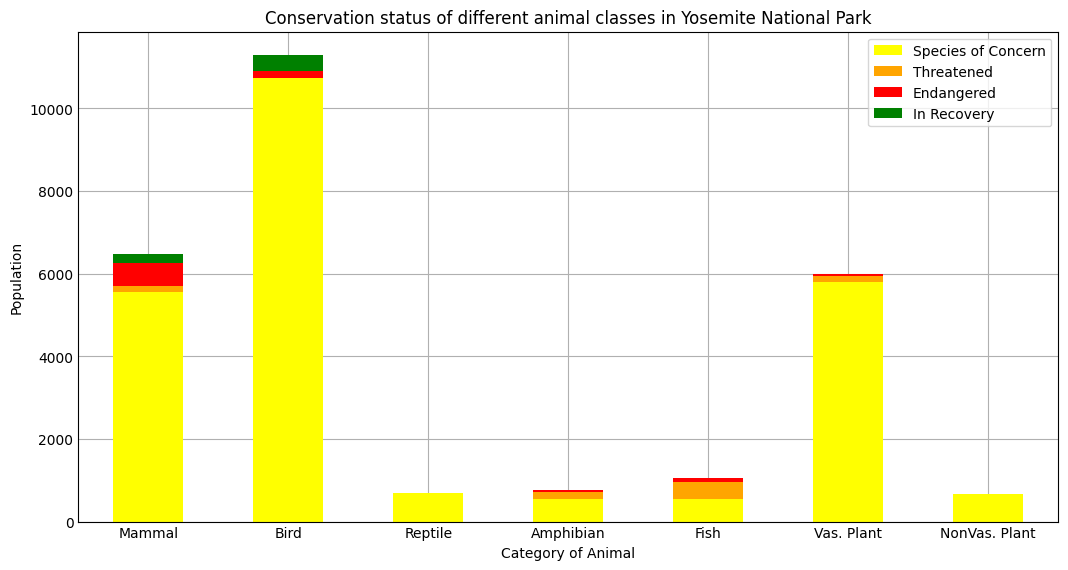

,Mammal,Bird,Reptile,Amphibian,Fish,Vas. Plant,NonVas. Plant
Species of Concern,5546,10735,684,556,547,5794,677
Threatened,146,0,0,156,403,144,0
Endangered,576,172,0,42,106,47,0
In Recovery,196,386,0,0,0,0,0


In [43]:
#Graph of conservation status across categories of Yosemite National Park
Yosemite={'Mammal':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
          'Bird':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
          'Reptile':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
          'Amphibian':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
          'Fish':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
          'Vas. Plant':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
          'NonVas. Plant':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}} 


for index, row in inner_merge_df.iterrows():
       if row[1] == 'Yosemite National Park':
              if row[5] != 'NaN':
                     Yosemite[row[3]][row[5]] += row[2]

df1 = pd.DataFrame(Yosemite)
ax = df1.transpose().plot(kind='bar', stacked=True, figsize=(10,5), color=colors, title='Conservation status of different animal classes in Yosemite National Park', rot=0)
ax.set_xlabel('Category of Animal')
ax.set_ylabel('Population')

plt.show()
df1

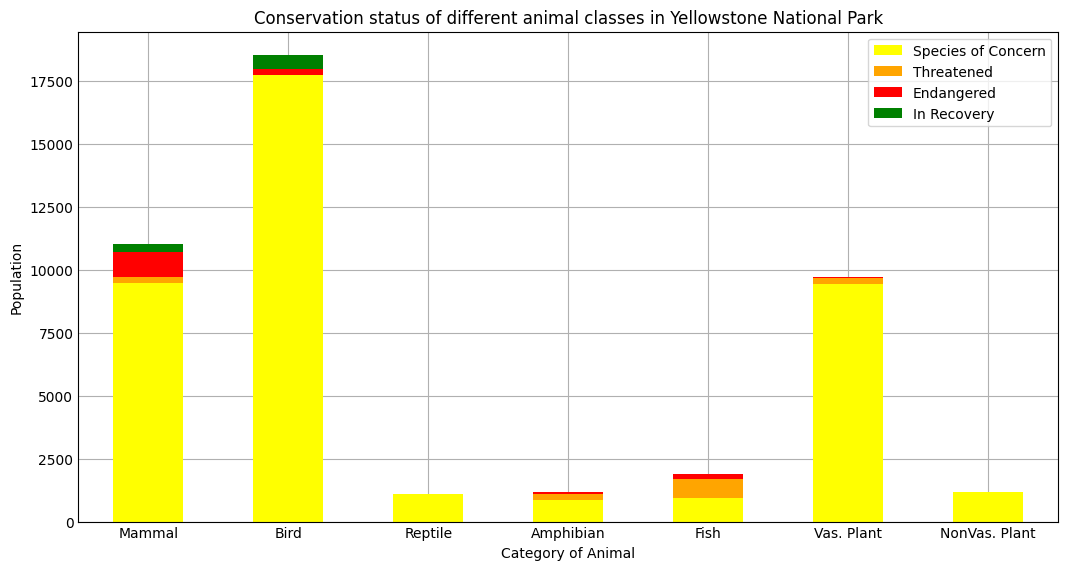

,Mammal,Bird,Reptile,Amphibian,Fish,Vas. Plant,NonVas. Plant
Species of Concern,9452,17724,1100,852,955,9425,1169
Threatened,258,0,0,255,718,228,0
Endangered,990,243,0,60,202,63,0
In Recovery,330,559,0,0,0,0,0


In [42]:
#Graph of conservation status across categories of Yellowstone National Park
Yellowstone={'Mammal':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
             'Bird':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
             'Reptile':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
             'Amphibian':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
             'Fish':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
             'Vas. Plant':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
             'NonVas. Plant':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}} 

for index, row in inner_merge_df.iterrows():
       if row[1] == 'Yellowstone National Park':
              if row[5] != 'NaN':
                     Yellowstone[row[3]][row[5]] += row[2]

df1 = pd.DataFrame(Yellowstone)
ax = df1.transpose().plot(kind='bar', stacked=True, figsize=(10,5), color=colors, title='Conservation status of different animal classes in Yellowstone National Park', rot=0)
ax.set_xlabel('Category of Animal')
ax.set_ylabel('Population')

plt.show()
df1

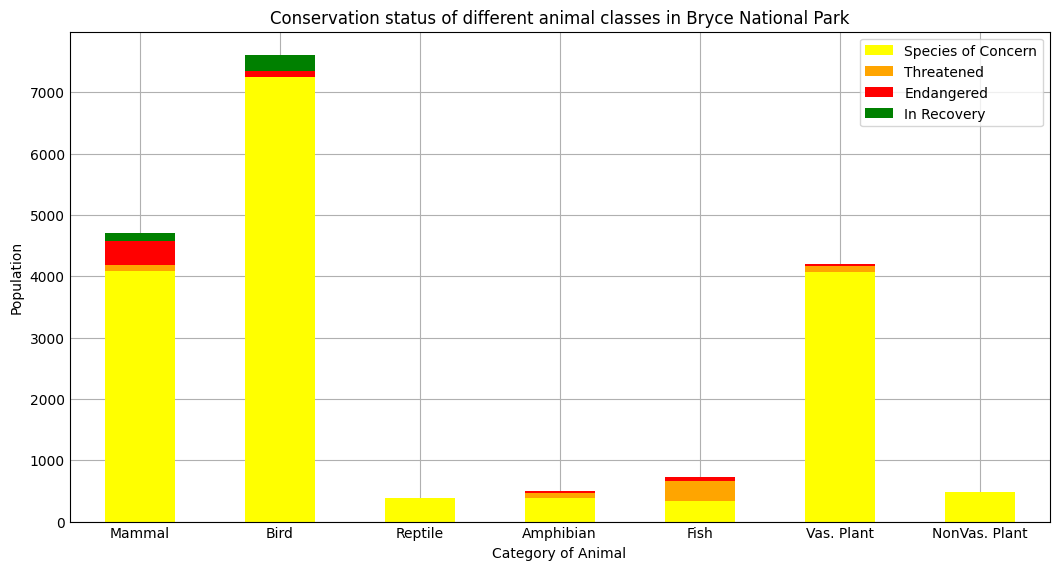

,Mammal,Bird,Reptile,Amphibian,Fish,Vas. Plant,NonVas. Plant
Species of Concern,4086,7252,387,387,339,4074,486
Threatened,90,0,0,80,322,99,0
Endangered,395,98,0,31,70,25,0
In Recovery,130,258,0,0,0,0,0


In [41]:
#Graph of conservation status across categories of Bryce National Park
Bryce={'Mammal':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
       'Bird':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Reptile':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Amphibian':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Fish':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Vas. Plant':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
       'NonVas. Plant':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}} 


for index, row in inner_merge_df.iterrows():
       if row[1] == 'Bryce National Park':
              if row[5] != 'NaN':
                     Bryce[row[3]][row[5]] += row[2]

df1 = pd.DataFrame(Bryce)
ax = df1.transpose().plot(kind='bar', stacked=True, figsize=(10,5), color=colors, title='Conservation status of different animal classes in Bryce National Park', rot=0)
ax.set_xlabel('Category of Animal')
ax.set_ylabel('Population')

plt.show()
df1

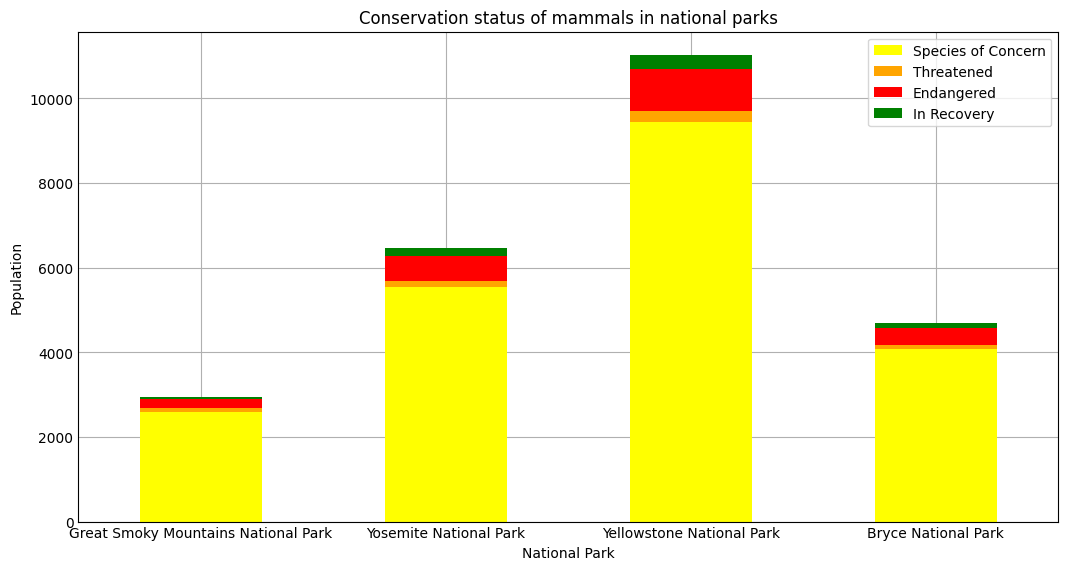

,Great Smoky Mountains National Park,Yosemite National Park,Yellowstone National Park,Bryce National Park
Species of Concern,2591,5546,9452,4086
Threatened,84,146,258,90
Endangered,217,576,990,395
In Recovery,59,196,330,130


In [45]:
# Graph showing comparison of single categories across different parks
Mammal={'Great Smoky Mountains National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
       'Yosemite National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Yellowstone National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Bryce National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}} 

colors=['yellow', 'orange', 'red', 'green']

for index, row in inner_merge_df.iterrows():
       if row[3] == 'Mammal':
              if row[5] != 'NaN':
                     Mammal[row[1]][row[5]] += row[2]

df = pd.DataFrame(Mammal)
ax = df.transpose().plot(kind='bar', stacked=True, figsize=(10,5), color=colors, title='Conservation status of mammals in national parks', rot=0)
ax.set_xlabel('National Park')
ax.set_ylabel('Population')

plt.show()
df

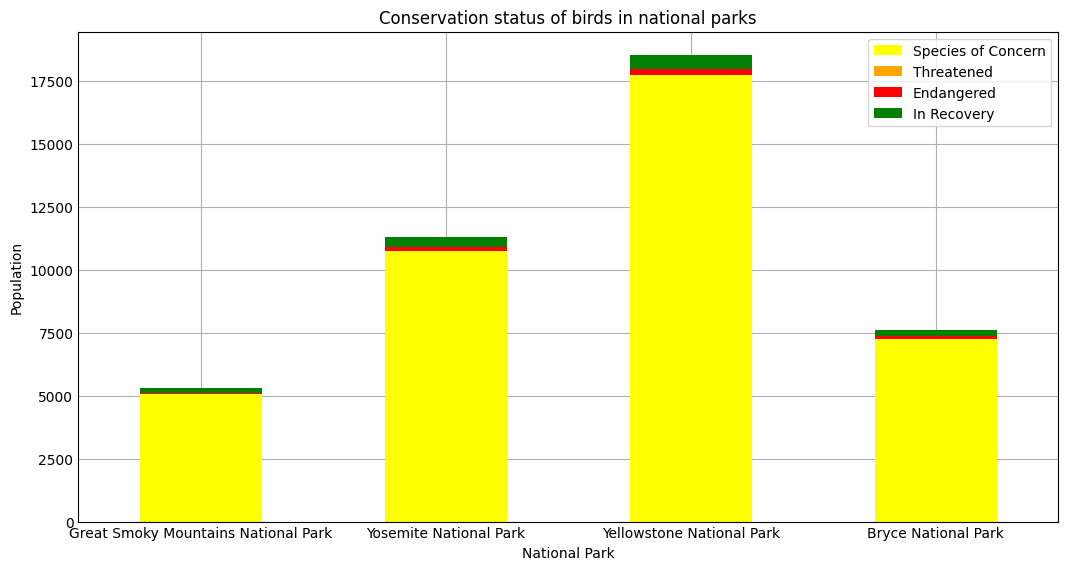

,Great Smoky Mountains National Park,Yosemite National Park,Yellowstone National Park,Bryce National Park
Species of Concern,5047,10735,17724,7252
Threatened,0,0,0,0
Endangered,61,172,243,98
In Recovery,189,386,559,258


In [46]:
# Graph showing comparison of single categories across different parks
Bird={'Great Smoky Mountains National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
       'Yosemite National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Yellowstone National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Bryce National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}} 

colors=['yellow', 'orange', 'red', 'green']

for index, row in inner_merge_df.iterrows():
       if row[3] == 'Bird':
              if row[5] != 'NaN':
                     Bird[row[1]][row[5]] += row[2]

df = pd.DataFrame(Bird)
ax = df.transpose().plot(kind='bar', stacked=True, figsize=(10,5), color=colors, title='Conservation status of birds in national parks', rot=0)
ax.set_xlabel('National Park')
ax.set_ylabel('Population')

plt.show()
df




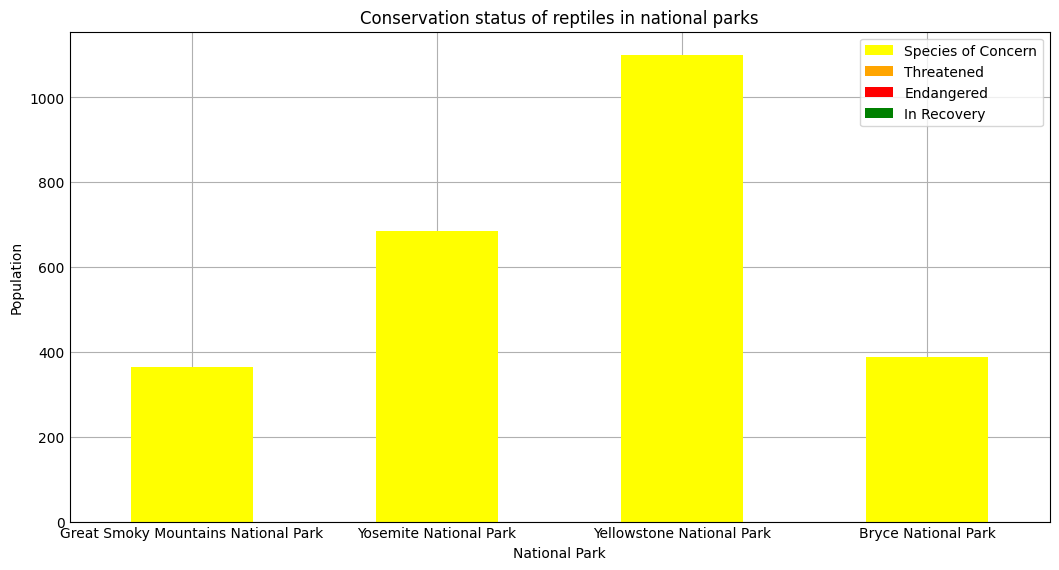

,Great Smoky Mountains National Park,Yosemite National Park,Yellowstone National Park,Bryce National Park
Species of Concern,365,684,1100,387
Threatened,0,0,0,0
Endangered,0,0,0,0
In Recovery,0,0,0,0


In [47]:
# Graph showing comparison of single categories across different parks
Reptile={'Great Smoky Mountains National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
       'Yosemite National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Yellowstone National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Bryce National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}} 

colors=['yellow', 'orange', 'red', 'green']

for index, row in inner_merge_df.iterrows():
       if row[3] == 'Reptile':
              if row[5] != 'NaN':
                     Reptile[row[1]][row[5]] += row[2]

df = pd.DataFrame(Reptile)
ax = df.transpose().plot(kind='bar', stacked=True, figsize=(10,5), color=colors, title='Conservation status of reptiles in national parks', rot=0)
ax.set_xlabel('National Park')
ax.set_ylabel('Population')

plt.show()
df




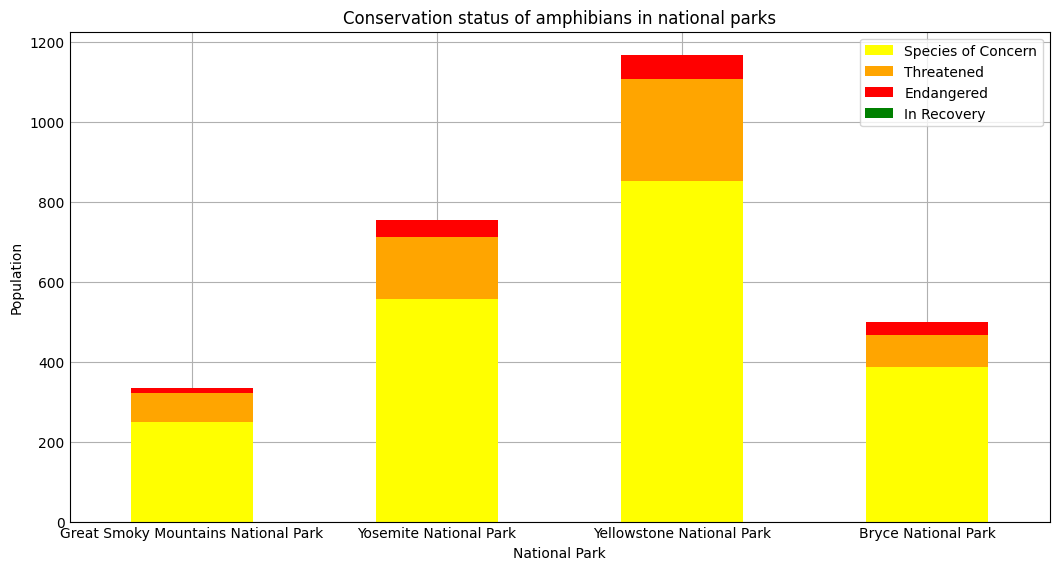

,Great Smoky Mountains National Park,Yosemite National Park,Yellowstone National Park,Bryce National Park
Species of Concern,249,556,852,387
Threatened,73,156,255,80
Endangered,11,42,60,31
In Recovery,0,0,0,0


In [49]:
# Graph showing comparison of single categories across different parks
Amphibians={'Great Smoky Mountains National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
       'Yosemite National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Yellowstone National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Bryce National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}} 

colors=['yellow', 'orange', 'red', 'green']

for index, row in inner_merge_df.iterrows():
       if row[3] == 'Amphibian':
              if row[5] != 'NaN':
                     Amphibians[row[1]][row[5]] += row[2]

df = pd.DataFrame(Amphibians)
ax = df.transpose().plot(kind='bar', stacked=True, figsize=(10,5), color=colors, title='Conservation status of amphibians in national parks', rot=0)
ax.set_xlabel('National Park')
ax.set_ylabel('Population')

plt.show()
df




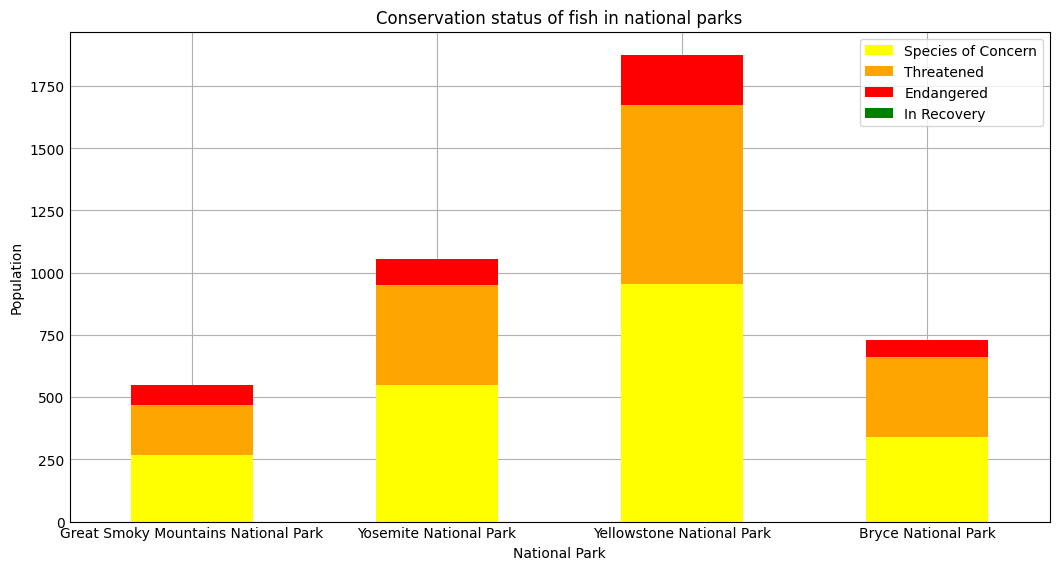

,Great Smoky Mountains National Park,Yosemite National Park,Yellowstone National Park,Bryce National Park
Species of Concern,268,547,955,339
Threatened,202,403,718,322
Endangered,77,106,202,70
In Recovery,0,0,0,0


In [50]:
# Graph showing comparison of single categories across different parks
Fish={'Great Smoky Mountains National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
       'Yosemite National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Yellowstone National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Bryce National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}} 

colors=['yellow', 'orange', 'red', 'green']

for index, row in inner_merge_df.iterrows():
       if row[3] == 'Fish':
              if row[5] != 'NaN':
                     Fish[row[1]][row[5]] += row[2]

df = pd.DataFrame(Fish)
ax = df.transpose().plot(kind='bar', stacked=True, figsize=(10,5), color=colors, title='Conservation status of fish in national parks', rot=0)
ax.set_xlabel('National Park')
ax.set_ylabel('Population')

plt.show()
df




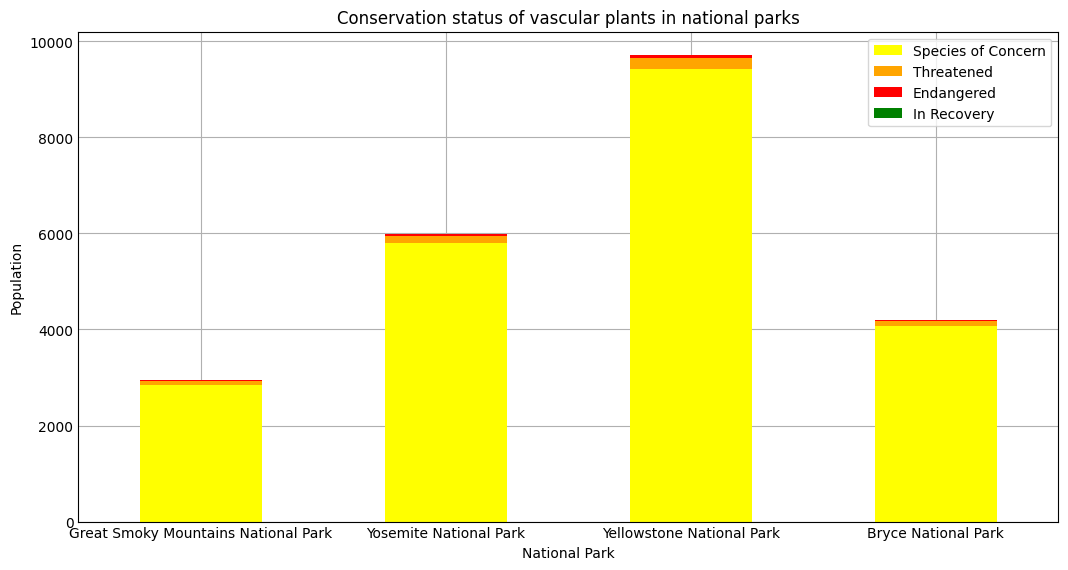

,Great Smoky Mountains National Park,Yosemite National Park,Yellowstone National Park,Bryce National Park
Species of Concern,2842,5794,9425,4074
Threatened,81,144,228,99
Endangered,27,47,63,25
In Recovery,0,0,0,0


In [52]:
# Graph showing comparison of single categories across different parks
Vas_Plants={'Great Smoky Mountains National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
       'Yosemite National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Yellowstone National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Bryce National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}} 

colors=['yellow', 'orange', 'red', 'green']

for index, row in inner_merge_df.iterrows():
       if row[3] == 'Vas. Plant':
              if row[5] != 'NaN':
                     Vas_Plants[row[1]][row[5]] += row[2]

df = pd.DataFrame(Vas_Plants)
ax = df.transpose().plot(kind='bar', stacked=True, figsize=(10,5), color=colors, title='Conservation status of vascular plants in national parks', rot=0)
ax.set_xlabel('National Park')
ax.set_ylabel('Population')

plt.show()
df




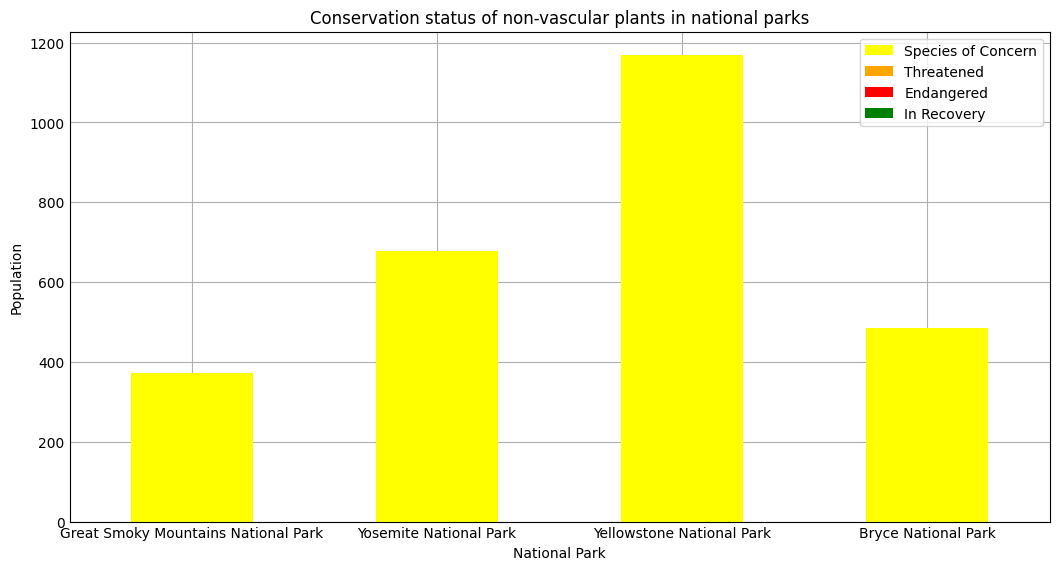

,Great Smoky Mountains National Park,Yosemite National Park,Yellowstone National Park,Bryce National Park
Species of Concern,373,677,1169,486
Threatened,0,0,0,0
Endangered,0,0,0,0
In Recovery,0,0,0,0


In [53]:
# Graph showing comparison of single categories across different parks
Nonvas_Plants={'Great Smoky Mountains National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0},
       'Yosemite National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Yellowstone National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}, 
       'Bryce National Park':{'Species of Concern': 0, 'Threatened':0, 'Endangered':0, 'In Recovery':0}} 

colors=['yellow', 'orange', 'red', 'green']

for index, row in inner_merge_df.iterrows():
       if row[3] == 'NonVas. Plant':
              if row[5] != 'NaN':
                     Nonvas_Plants[row[1]][row[5]] += row[2]

df = pd.DataFrame(Nonvas_Plants)
ax = df.transpose().plot(kind='bar', stacked=True, figsize=(10,5), color=colors, title='Conservation status of non-vascular plants in national parks', rot=0)
ax.set_xlabel('National Park')
ax.set_ylabel('Population')

plt.show()
df


